In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sns.set_style('darkgrid')


/kaggle/input/global-suicide-rates-1990-to-2022/age_std_suicide_rates_1990-2022.csv
/kaggle/input/global-suicide-rates-1990-to-2022/suicide_rates_1990-2022.csv


In [2]:
df = pd.read_csv("/kaggle/input/global-suicide-rates-1990-to-2022/suicide_rates_1990-2022.csv")

Retrieve dimensions

In [3]:
df.shape

(118560, 18)

Retrieve column names and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [5]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [6]:
df.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118559,NAC,North America and the Caribbean,USA,United States of America,2021,Female,Unknown,Unknown,0.0,0.000000,NaN,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


Descriptive statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,118560.0,2.005740e+03,8.745003e+00,1.990000e+03,1.999000e+03,2.006000e+03,2.013000e+03,2.022000e+03
SuicideCount,118096.0,6.363204e+01,2.540954e+02,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,6.787000e+03
CauseSpecificDeathPercentage,114271.0,3.873690e+00,7.317820e+00,0.000000e+00,0.000000e+00,5.861665e-01,4.355646e+00,1.000000e+02
DeathRatePer100K,107896.0,1.229979e+01,2.101617e+01,0.000000e+00,0.000000e+00,4.452366e+00,1.538462e+01,5.025126e+02
Population,112640.0,2.456184e+07,4.531156e+07,4.054200e+04,2.613805e+06,6.888434e+06,2.533364e+07,3.320316e+08
GDP,111320.0,4.883351e+11,1.653252e+12,2.197630e+08,1.162585e+10,6.268216e+10,3.013550e+11,2.331510e+13
GDPPerCapita,111320.0,1.742351e+04,1.933214e+04,6.023512e+01,3.941599e+03,9.708141e+03,2.519727e+04,1.337118e+05
GrossNationalIncome,108600.0,4.976795e+11,1.689591e+12,2.082832e+08,1.176795e+10,5.987715e+10,3.057210e+11,2.370530e+13
GNIPerCapita,107800.0,2.214722e+04,1.888640e+04,7.800000e+02,8.670000e+03,1.615000e+04,2.953000e+04,1.526300e+05
InflationRate,104100.0,2.028646e+01,1.630999e+02,-1.063010e+01,1.498961e+00,3.038888e+00,6.536199e+00,4.734914e+03


Let's try and understand the textual data in our dataframe

In [8]:
df.describe(exclude=np.number).T

,count,unique,top,freq
RegionCode,118560,6,EU,45140
RegionName,118560,6,Europe,45140
CountryCode,118560,117,ARG,1740
CountryName,118560,117,Argentina,1740
Sex,118560,3,Male,58320
AgeGroup,118560,7,0-14 years,23712
Generation,118560,7,Generation Alpha,23712


**count:** This shows the total number of entries (rows) in each non-numeric column. For example, there are 118560 entries in the RegionCode column.

**unique:** This indicates the number of unique text values present in each non-numeric column. There are six unique RegionCode values, likely representing different regions of the world.
 
**top:** This column shows the most frequent value in each non-numeric column. For instance, "EU" appears most often in the RegionCode column.
 
**freq:** This indicates the number of times the most frequent value (top) appears in each column. In this case, the value "EU" appears 45140 times in the RegionCode column.

# ****Let's clean the data

In [9]:
df = df.drop_duplicates()
df


,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
5,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,4.0,1.904762,3.276003,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
6,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,3.0,1.357466,2.487562,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
7,EU,Europe,ALB,Albania,1992,Male,25-34 years,Millennials,4.0,2.094241,3.202562,3247039.0,6.521750e+08,200.85222,9.061842e+08,1740.0,226.005421,45.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [10]:
def clean_and_visualize_missing_values(df, threshold=20):
    """Calculates missing value percentages, creates a visualization, and handles missing values."""

    missing_percentages = df.isna().sum() * 100 / len(df)

    # Print information about missing values
    print("Number of columns with missing values above threshold:", sum(missing_percentages > threshold))

     # Sort and visualize missing percentages
    missing_percentages_sorted = missing_percentages.sort_values(ascending=False)
    missing_percentages_sorted.plot(kind='barh', title="Percentage of Missing Values")
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')  # Add threshold line
    plt.xlabel("Percentage of Missing Values")
    plt.legend()
    plt.show()

    # Handle missing values (e.g., drop columns for demonstration)
    for column, missing_percentage in missing_percentages_sorted.items():
        if missing_percentage > threshold:
            df.drop(columns=column, inplace=True)
            print("Dropped column:", column)




1. Defines a function clean_and_visualize_missing_values that calculates missing value percentages, creates a visualization, and handles missing values based on a threshold parameter (threshold with a default value of 20).
2. Prints information about the number of columns with missing values above the threshold.
3. Sorts and visualizes missing percentages in descending order, adds a threshold line to the plot, and displays the plot with additional labeling.
4. Handles missing values by dropping columns that exceed the threshold, and prints a message for each dropped column.

In [11]:
from IPython.display import HTML

total_suicides = df['SuicideCount'].sum() / 1e6  # Millions
total_suicides_per_100k = df['DeathRatePer100K'].mean()

# Calculate average GDP and GDP per Capita
average_gdp = df['GDP'].mean()
average_gdp_billion = average_gdp / 1e9  # Convert to billions of dollars
average_gdp_per_capita = df['GDPPerCapita'].mean()

# Calculate the year with the highest and lowest suicide rates, excluding 2022
highest_suicide_year = df[df['Year'] != 2022].groupby('Year')['DeathRatePer100K'].sum().idxmax()
lowest_suicide_year = df[df['Year'] != 2022].groupby('Year')['DeathRatePer100K'].sum().idxmin()

# Calculate the generation with the highest suicide rates
generation_with_highest_suicide = df.groupby('Generation')['DeathRatePer100K'].sum().idxmax()

css_styles = """
<style>
.icon {  
  float: right;
  font-size: 500%;
  position: absolute;
  top: 0rem;
  right: -0.3rem;
  opacity: 0.16;
}

#container {
  width: 100%;
  max-width: 1200px;
  display: flex;
  flex-wrap: wrap;
}

.kpi-card {
  overflow: hidden;
  position: relative;
  box-shadow: 5px 5px 10px rgba(0, 0, 0, 0.3); /* Added 3D effect */
  display: inline-block;
  padding: 1em;
  border-radius: 0.3em;
  font-family: sans-serif;
  width: calc(25% - 1em);
  min-width: 180px;
  margin: 0.5em;
}

.card-value {
  display: block;
  font-size: 200%;
  font-weight: bold;
  color: white; /* Changed title color to white */
}

.card-text {
  display: block;
  font-size: 70%;
  padding-left: 0.2em;
  color: white; /* Changed title color to white */
}

.orange {
  background: #ffc241;
}

.purple {
  background: #886ab5;
}

.grey-dark {
  background: #495057;
}

.red {
  background: #a83b3b;
}
</style>
"""

html_code = f"""
<div id="container">
  <div class="kpi-card orange">
    <span class="card-value">{total_suicides:,.2f}M </span>
    <span class="card-text">Total Suicides</span>
    <i class="fas fa-skull-crossbones icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{total_suicides_per_100k:,.0f} </span>
    <span class="card-text">Average Suicides per 100k</span>
    <i class="fas fa-user-alt-slash icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">${average_gdp_billion:.2f}B </span>
    <span class="card-text">Average GDP</span>
    <i class="fas fa-chart-line icon"></i>
  </div>

  <div class="kpi-card red">
    <span class="card-value">{average_gdp_per_capita:,.0f} </span>
    <span class="card-text">GDP per Capita</span>
    <i class="fas fa-money-bill-alt icon"></i>
  </div>

  <div class="kpi-card orange">
    <span class="card-value">{highest_suicide_year} </span>
    <span class="card-text">Year with Highest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{lowest_suicide_year} </span>
    <span class="card-text">Year with Lowest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">{generation_with_highest_suicide} </span>
    <span class="card-text">Generation with Highest Suicide Rates</span>
    <i class="fas fa-user icon"></i>
  </div>
</div>
"""

HTML(css_styles + html_code)



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

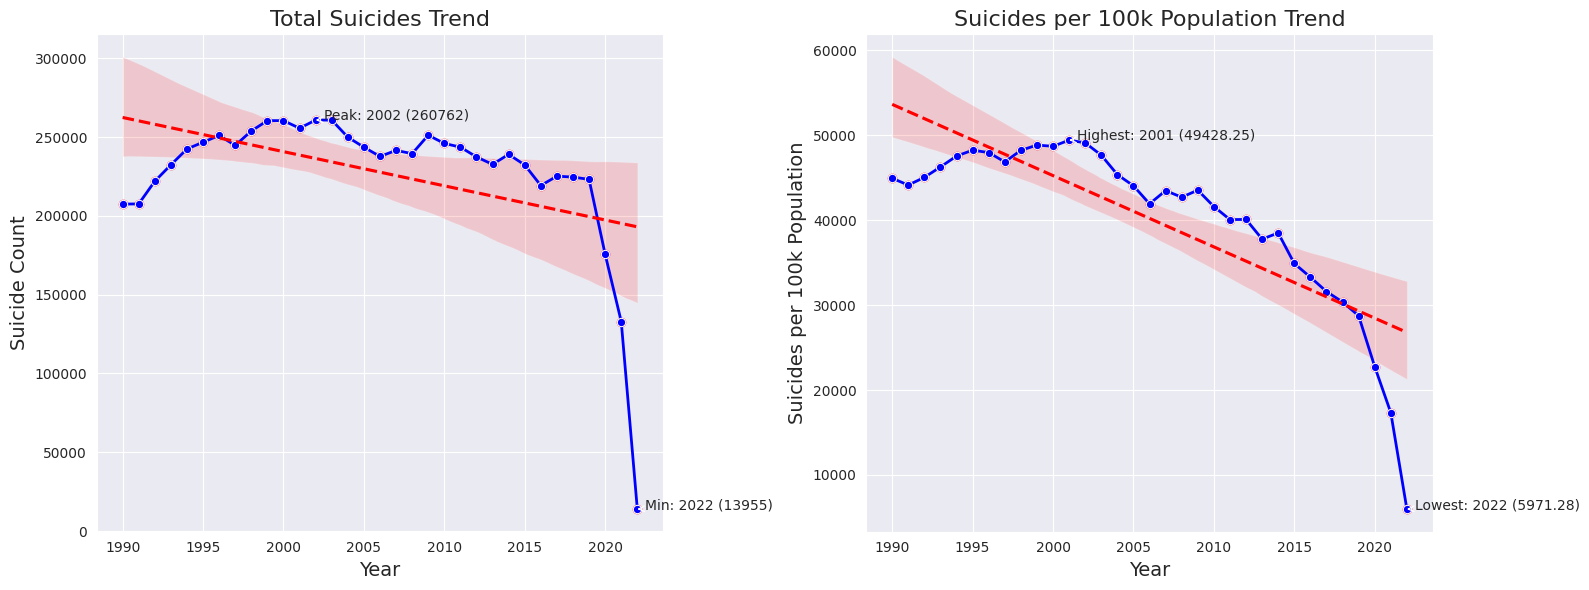

In [12]:
# Get year-wise totals
year_totals_count = df.groupby('Year')['SuicideCount'].sum().reset_index()
year_totals_rate = df.groupby('Year')['DeathRatePer100K'].sum().reset_index()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define a consistent color palette
palette = 'Set1'  # Adjust palette as needed

# Plot for Suicides Count
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year',
    y='SuicideCount',
    data=year_totals_count,
    marker='o',
    color='blue',
    ax=axes[0],
    linewidth=2  # Adjust line width
)

# Annotate peak year
max_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].max()]
min_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].min()]
axes[0].annotate(
    f"Peak: {max_year['Year'].values[0]} ({max_year['SuicideCount'].values[0]:.0f})",
    xy=(max_year['Year'].values[0], max_year['SuicideCount'].values[0]),
    xytext=(max_year['Year'].values[0] + 0.5, max_year['SuicideCount'].values[0] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[0].annotate(
    f"Min: {min_year['Year'].values[0]} ({min_year['SuicideCount'].values[0]:.0f})",
    xy=(min_year['Year'].values[0], min_year['SuicideCount'].values[0]),
    xytext=(min_year['Year'].values[0] + 0.5, min_year['SuicideCount'].values[0] - 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='SuicideCount', data=year_totals_count, ax=axes[0], color='r', line_kws={'linestyle':'--'})

axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicide Count", fontsize=14)
axes[0].set_title("Total Suicides Trend", fontsize=16)

# Plot for Suicides per 100k Population
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year',
    y='DeathRatePer100K',
    data=year_totals_rate,
    marker='o',
    color='blue',
    ax=axes[1],
    linewidth=2  # Adjust line width
)

# Highlight and annotate years with highest and lowest rates
highest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].max()]
lowest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].min()]

axes[1].annotate(
    f"Highest: {highest_rate_year['Year'].values[0]} ({highest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(highest_rate_year['Year'].values[0], highest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(highest_rate_year['Year'].values[0] + 0.5, highest_rate_year['DeathRatePer100K'].values[0] + 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[1].annotate(
    f"Lowest: {lowest_rate_year['Year'].values[0]} ({lowest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(lowest_rate_year['Year'].values[0], lowest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(lowest_rate_year['Year'].values[0] + 0.5, lowest_rate_year['DeathRatePer100K'].values[0] - 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='DeathRatePer100K', data=year_totals_rate, ax=axes[1], color='r', line_kws={'linestyle':'--'})

axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides per 100k Population Trend", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

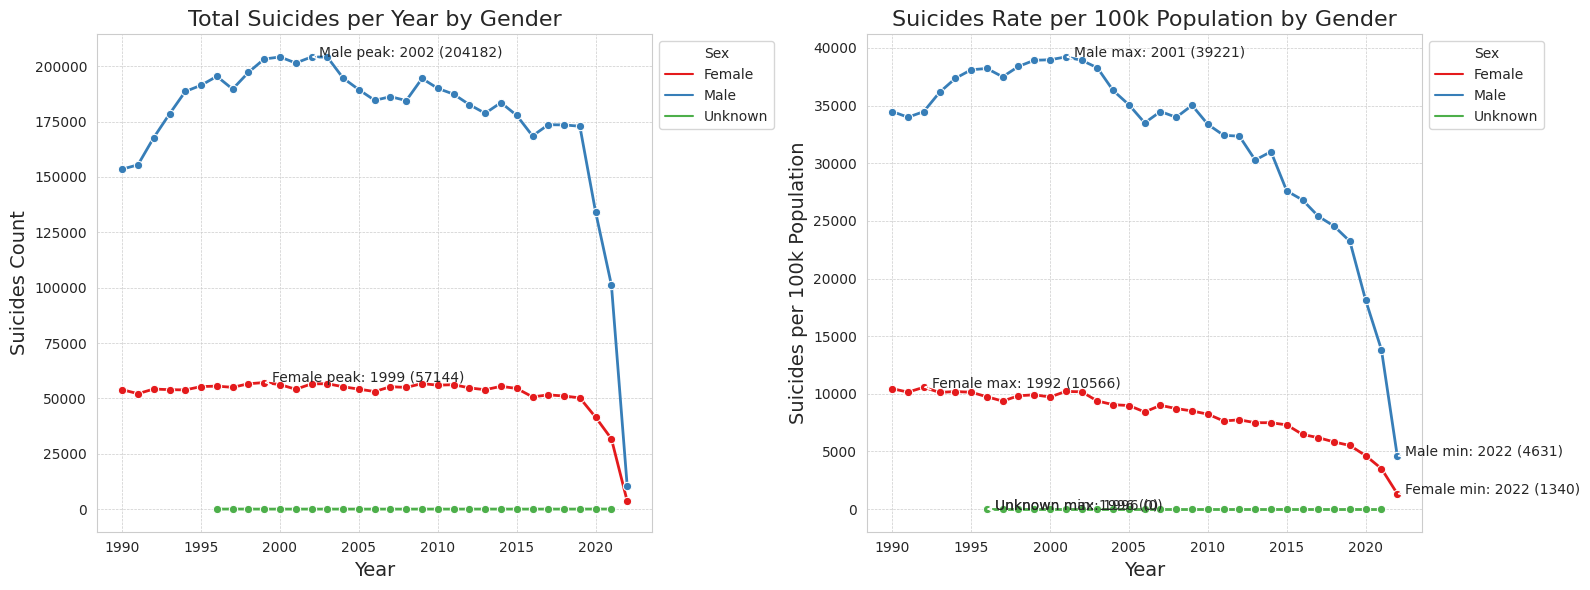

In [13]:
# Get year-wise totals by gender
gender_totals = df.groupby(['Year', 'Sex']).agg({'SuicideCount': 'sum', 'DeathRatePer100K': 'sum'}).reset_index()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define consistent style parameters
palette = 'Set1'
line_width = 2

# Plot for Suicides Count (stacked)
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year', y='SuicideCount', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[0], linewidth=line_width
)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicides Count", fontsize=14)
axes[0].set_title("Total Suicides per Year by Gender", fontsize=16)

# Plot for Suicides per 100k Population (stacked)
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year', y='DeathRatePer100K', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[1], linewidth=line_width
)
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides Rate per 100k Population by Gender", fontsize=16)

# Annotate significant increases/decreases for each gender in the Suicides Count plot
threshold = 100  # Adjust as needed
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'SuicideCount')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'SuicideCount')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_count = max_years_gender.iloc[0]['SuicideCount']
    min_count = min_years_gender.iloc[0]['SuicideCount']
    if max_count - min_count >= threshold:
        axes[0].annotate(f"{gender} peak: {max_year} ({max_count:.0f})", xy=(max_year, max_count),
                        xytext=(max_year + 0.5, max_count + 50), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Annotate maximum and minimum peaks for each gender in the Suicides Rate per 100k Population plot
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'DeathRatePer100K')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'DeathRatePer100K')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_rate = max_years_gender.iloc[0]['DeathRatePer100K']
    min_rate = min_years_gender.iloc[0]['DeathRatePer100K']
    axes[1].annotate(f"{gender} max: {max_year} ({max_rate:.0f})", xy=(max_year, max_rate),
                    xytext=(max_year + 0.5, max_rate + 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[1].annotate(f"{gender} min: {min_year} ({min_rate:.0f})", xy=(min_year, min_rate),
                    xytext=(min_year + 0.5, min_rate - 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set legend outside the plot area
axes[0].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust and show plot
for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Does location influence suicide rates?

In [14]:
df_standardized = pd.read_csv("/kaggle/input/global-suicide-rates-1990-to-2022/age_std_suicide_rates_1990-2022.csv")

In [15]:
df_pivoted_tot = df_standardized.pivot_table(index='Year', columns='CountryName', values='SuicideCount', aggfunc='sum')

# Sum the suicide counts for each country
country_suicide_totals = df_pivoted_tot.sum()

# Get the top 10 countries with the highest total suicide counts
top_10_countries = country_suicide_totals.nlargest(10)

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df_pivoted_tot[top_10_countries.index]

# Convert 'Year' column to string type (if necessary)
df_top_10.index = df_top_10.index.astype(str)

# Display the resulting DataFrame
df_top_10.head()

CountryName,Russian Federation,United States of America,Japan,Germany,Republic of Korea,France,Ukraine,Brazil,Poland,Mexico
Year,,,,,,,,,,
1990,39150.0,30906.0,20088.0,13924.0,3159.0,11403.0,10693.0,4843.0,4970.0,1938.0
1991,39388.0,30810.0,19875.0,14010.0,3069.0,11502.0,10743.0,5182.0,5316.0,2114.0
1992,46125.0,30484.0,20893.0,13458.0,3533.0,11644.0,11731.0,5252.0,5713.0,2246.0
1993,56136.0,31102.0,20516.0,12690.0,4124.0,12251.0,12541.0,5547.0,5624.0,2358.0
1994,61886.0,31142.0,20923.0,12718.0,4212.0,12041.0,13907.0,5931.0,5519.0,2603.0
